In [15]:
#library(ggthemes)
#library(pryr)
library(tidyverse)
library(scater)
library(idcells)


Attaching package: ‘idcells’

The following objects are masked _by_ ‘.GlobalEnv’:

    df2sparse, get_barcode_stats



In [16]:
df_simu_1 <- readRDS("task1_simu.filtered/simu_1.rds")
head(df_simu_1)

gene,barcode,count,simulation
ensg00000088930,atgcttctactgggtc-1,3,simu_1.gz
ensg00000011485,tgcgtgtgttaagcca-1,4,simu_1.gz
ensg00000083223,acgtcactaagggtgc-1,1,simu_1.gz
ensg00000077097,gatgtttacgctctta-1,2,simu_1.gz
ensg00000174100,cggccacgtgtcatta-1,1,simu_1.gz
ensg00000179085,cgtaggcgtctgaccc-1,2,simu_1.gz


In [5]:
#' Function to convert dataframe of (gene,barcode,umi_count) to sparse Matrix
#' @export
#df2sparse <- function(d) {
#    stopifnot(all(c("gene","barcode","count") %in% colnames(d)))
#    g <- as.factor(d$gene)
#    b <- as.factor(d$barcode)
#    m <- Matrix::sparseMatrix(i=as.numeric(g), j=as.numeric(b), x=d$count)
#    colnames(m) <- levels(b)
#    rownames(m) <- levels(g)
#    m
#}

In [6]:
mat_simu_1 <- df2sparse(df_simu_1)
dim(mat_simu_1)
set.seed(101)
mat_simu_1_small <- mat_simu_1[, sample(x = 1:ncol(mat_simu_1), size = 10000)]

[1] 21490 72239

In [8]:
#' Get barcode stats
#' 
#' @param mat numeric matrix, rows represent genes, columns represent cells
#' 
#' @return a data_frame with barcode-level statistics
#' 
#' @export
get_barcode_stats <- function(mat) {
    dplyr::data_frame(
        total_counts = colSums(mat),
        mean_counts = colMeans(mat),
        var_counts = matrixStats::colVars(mat),
        genes_detected = colSums(mat > 0),
        prop_detected = colMeans(mat > 0)
    )
}

In [9]:
bcstats_simu_1 <- get_barcode_stats(as.matrix(mat_simu_1))
head(bcstats_simu_1)

total_counts,mean_counts,var_counts,genes_detected,prop_detected
237,0.011028385,0.01891136,187,0.008701722
182,0.008469055,0.01165520,154,0.007166124
225,0.010469986,0.01408368,194,0.009027455
313,0.014564914,0.03008242,228,0.010609586
232,0.010795719,0.01775305,184,0.008562122
271,0.012610517,0.02241065,207,0.009632387


In [17]:
pd <- as(data.frame(barcode = colnames(mat_simu_1_small)), 
         "AnnotatedDataFrame")
rownames(pd) <- colnames(mat_simu_1_small)
fd <- as(data.frame(gene_id = rownames(mat_simu_1_small)), 
         "AnnotatedDataFrame")
rownames(fd) <- rownames(mat_simu_1_small)
sce <- newSCESet(countData = as.matrix(mat_simu_1_small), phenoData = pd,
                 featureData = fd)
ambient_bool <- read_tsv("ambient_genes.txt", col_names = FALSE)
ambient_sparse <- read_tsv("ambient_genes.sparse.txt", col_names = FALSE)
ambient_gene <- read_tsv("ambient_genes.gene_names.txt", col_names = FALSE)
ambient <- bind_cols(ambient_gene, ambient_bool, ambient_sparse)
table(ambient[[1]] %in% featureNames(sce))
sce <- sce[(featureNames(sce) %in% ambient[[1]]),]
ambient <- ambient[ambient[[1]] %in% featureNames(sce),]
fData(sce)$ambient_gene_l2 <- ambient[[2]]
fData(sce)$ambient_gene_l1 <- ambient[[3]]
sce <- sce[rowSums(counts(sce)) > 0.5,]
sce

Parsed with column specification:
cols(
  X1 = col_logical()
)
Parsed with column specification:
cols(
  X1 = col_logical()
)
Parsed with column specification:
cols(
  X1 = col_character()
)



FALSE  TRUE 
  372 21372 

SCESet (storageMode: lockedEnvironment)
assayData: 17325 features, 10000 samples 
  element names: counts, exprs 
protocolData: none
phenoData
  sampleNames: cgacgtgacaataaat-1 aatgcaacgcggtgct-1 ...
    tgactagtactgtaaa-1 (10000 total)
  varLabels: barcode
  varMetadata: labelDescription
featureData
  featureNames: ensg00000000003 ensg00000000419 ... ensg00000273493
    (17325 total)
  fvarLabels: gene_id ambient_gene_l2 ambient_gene_l1
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [18]:
sce <- calculateQCMetrics(sce, 
                          feature_controls = list(ambient = fData(sce)$ambient_gene_l1))

In [16]:
saveRDS(sce, "sceset_simu_1.rds")

## Ambient gene analysis

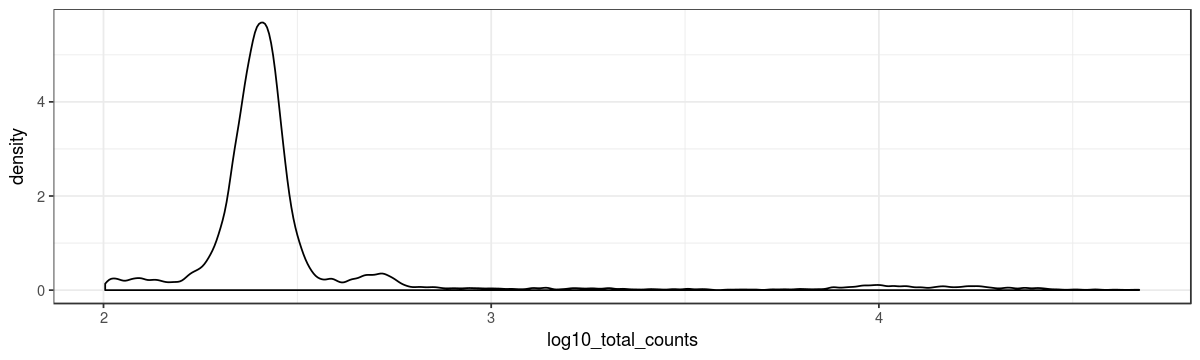

In [19]:
options(repr.plot.width = 10, repr.plot.height=3)
ggplot(pData(sce), aes(x = log10_total_counts)) +
    geom_density(alpha = 0.4) +
    theme_bw() + viridis::scale_color_viridis()

In [10]:
profile_ambient <- function(object, min_umis = 1000) {
    
}

[1] "barcode"                                      
 [2] "total_counts"                                 
 [3] "log10_total_counts"                           
 [4] "filter_on_total_counts"                       
 [5] "total_features"                               
 [6] "log10_total_features"                         
 [7] "filter_on_total_features"                     
 [8] "pct_dropout"                                  
 [9] "exprs_feature_controls_ambient"               
[10] "pct_exprs_feature_controls_ambient"           
[11] "filter_on_pct_exprs_feature_controls_ambient" 
[12] "counts_feature_controls_ambient"              
[13] "pct_counts_feature_controls_ambient"          
[14] "filter_on_pct_counts_feature_controls_ambient"
[15] "n_detected_feature_controls_ambient"          
[16] "n_detected_feature_controls"                  
[17] "counts_feature_controls"                      
[18] "pct_counts_feature_controls"                  
[19] "filter_on_pct_counts_feature_controls"        
[20] "pct_counts_top_50_features"                   
[21] "pct_counts_top_100_features"                  
[22] "pct_counts_top_200_features"                  
[23] "pct_counts_top_500_features"                  
[24] "pct_counts_top_50_endogenous_features"        
[25] "pct_counts_top_100_endogenous_features"       
[26] "pct_counts_top_200_endogenous_features"       
[27] "pct_counts_top_500_endogenous_features"       
[28] "counts_endogenous_features"                   
[29] "log10_counts_feature_controls_ambient"        
[30] "log10_counts_feature_controls"                
[31] "log10_counts_endogenous_features"             
[32] "is_cell_control"

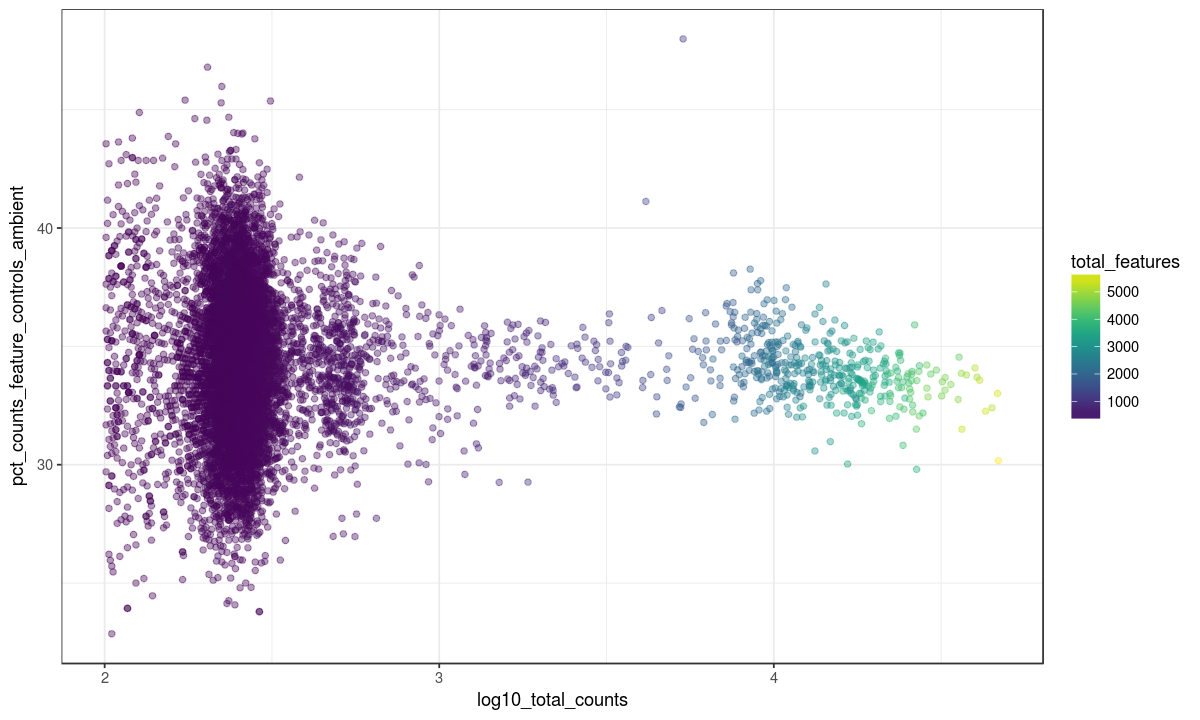

In [14]:
options(repr.plot.width = 10, repr.plot.height=6)
ggplot(pData(sce), aes(x = log10_total_counts, y = pct_counts_feature_controls_ambient, colour = total_features)) +
    geom_point(alpha = 0.4) +
    theme_bw() + viridis::scale_color_viridis()


In [30]:
sce$gini_all_genes <- apply(exprs(sce), 2, Gini)
ubiq_genes <- featureNames(sce)[fData(sce)$n_cells_exprs > 2500]
nonubiq_genes <- featureNames(sce)[fData(sce)$n_cells_exprs < 2500]
sce$gini_ubiq_genes <- apply(exprs(sce)[ubiq_genes,], 2, Gini)
sce$gini_nonubiq_genes <- apply(exprs(sce)[nonubiq_genes,], 2, Gini)
sce$gini_ambient_genes_l1 <- apply(exprs(sce)[fData(sce)$ambient_gene_l1,], 2, Gini)
sce$gini_ambient_genes_l2 <- apply(exprs(sce)[fData(sce)$ambient_gene_l2,], 2, Gini)

ERROR: Error in match.fun(FUN): object 'Gini' not found


## Covariance/distance analysis

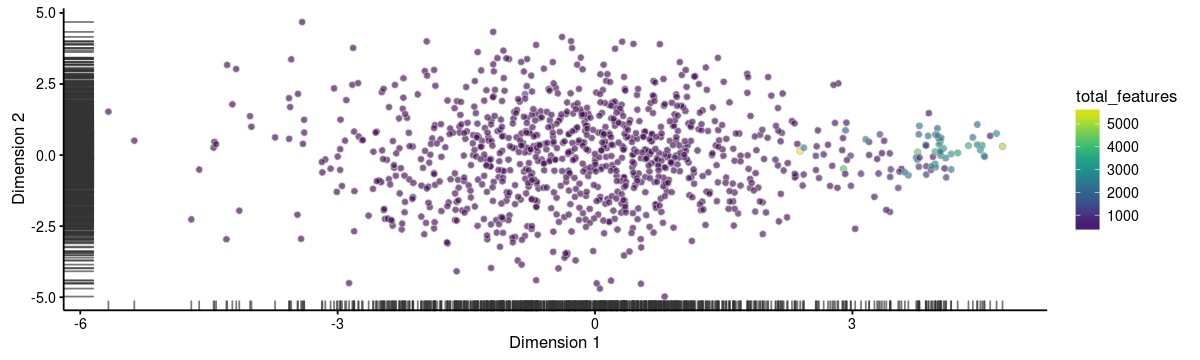

In [20]:
# Euclidean
sce_1000 <- sce[fData(sce)$ambient_gene_l1, 1:1000]
d1 <- dist(as.matrix(t(exprs(sce_1000))))
mds1 <- cmdscale(d1, k = 3)
redDim(sce_1000) <- mds1
plotReducedDim(sce_1000, colour_by = "total_features")

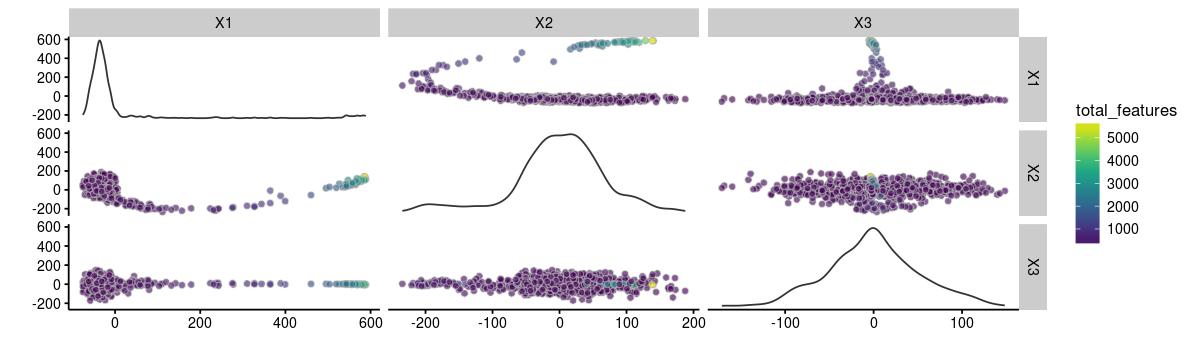

In [41]:
# Canberra
d2 <- dist(as.matrix(t(exprs(sce_1000))), method = "canberra")
mds2 <- cmdscale(d2, k = 3)
redDim(sce_1000) <- mds2
plotReducedDim(sce_1000,ncomponents=3, colour_by = "total_features")

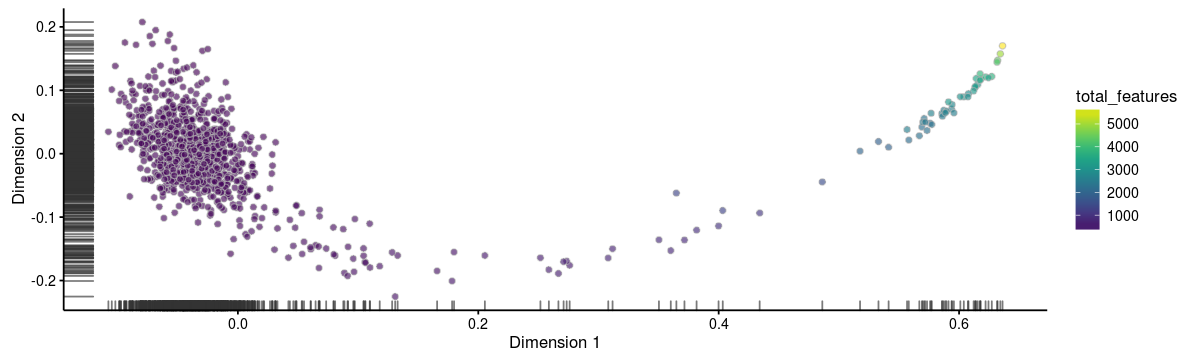

In [22]:
# Binary
d3 <- dist(as.matrix(t(exprs(sce_1000))), method = "binary")
mds3 <- cmdscale(d3, k = 3)
redDim(sce_1000) <- mds3
plotReducedDim(sce_1000, colour_by = "total_features")

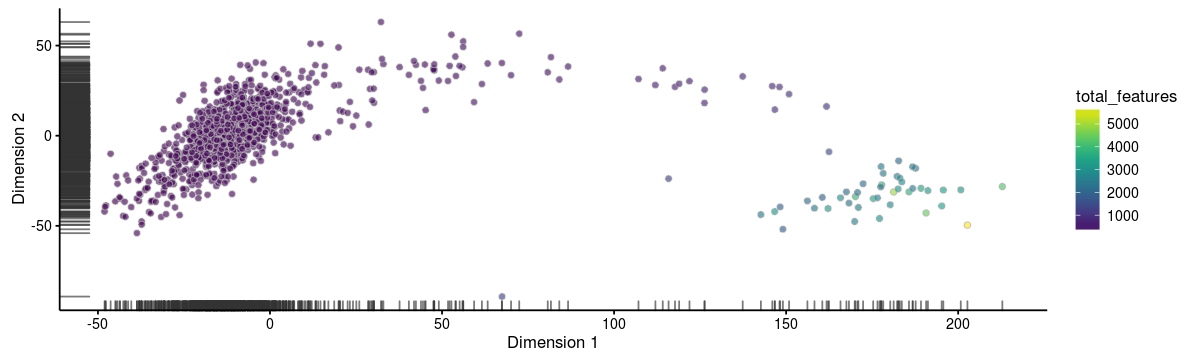

In [23]:
# Manhattan Distance
d4 <- dist(as.matrix(t(exprs(sce_1000))), method = "manhattan")
mds4 <- cmdscale(d4, k = 3)
redDim(sce_1000) <- mds4
plotReducedDim(sce_1000, colour_by = "total_features")

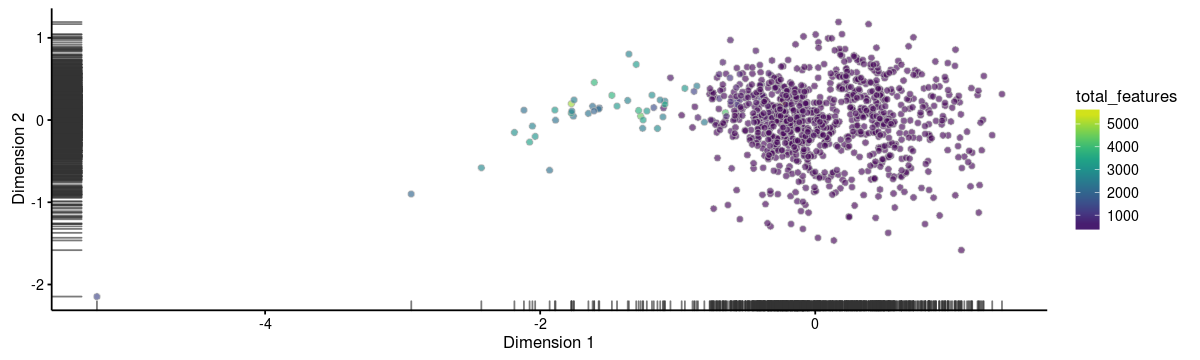

In [26]:
# Minkowski
d5 <- dist(as.matrix(t(exprs(sce_1000))), method = "minkowski",p=6)
mds5 <- cmdscale(d5, k = 3)
redDim(sce_1000) <- mds5
plotReducedDim(sce_1000, colour_by = "total_features")

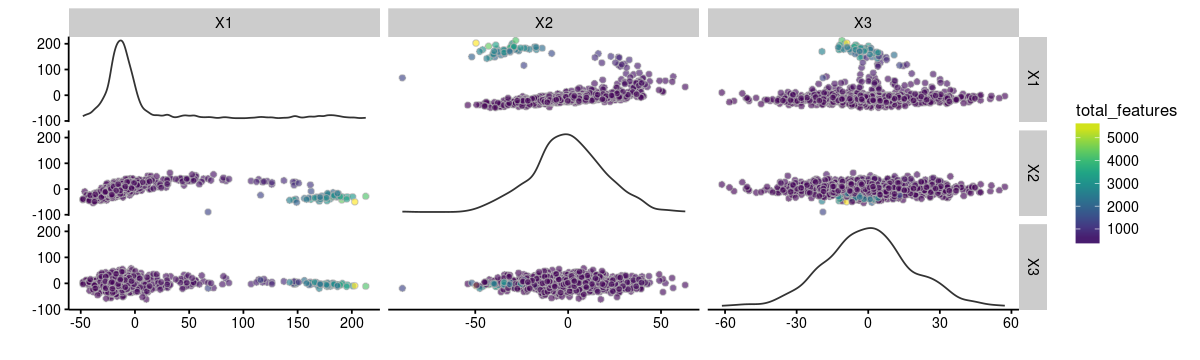

In [39]:
# Manhattan Distance
d4 <- dist(as.matrix(t(exprs(sce_1000))), method = "manhattan")
mds4 <- cmdscale(d4, k = 3)
redDim(sce_1000) <- mds4
plotReducedDim(sce_1000,ncomponents=3, colour_by = "total_features")

In [31]:
sce_good <- sce[, sce$total_features > 1000 & sce$total_counts > 2000]
sce_bad <- sce[, sce$total_features < 1000 | sce$total_counts < 2000]
bad_profile_exprs <- matrixStats::rowMedians(exprs(sce_bad))
bad_profile_counts <- matrixStats::rowMedians(counts(sce_bad))

In [34]:
score1 <- bad_profile_exprs %*% exprs(sce)
sce$bad_score_exprs_pears <- score1[1,]

score2 <- cor(exprs(sce), bad_profile_exprs, method = "spearman")

sce$bad_score_exprs_spear <- score2[, 1]

In [46]:
dim(mat_simu_1_small)

[1] 21490 10000

In [47]:
cov = t(mat_simu_1_small) %*% mat_simu_1_small

In [50]:
cov_mat = as.matrix(cov)